
<img src="beer.jpeg" alt="Beer" style="height: 500px; width:800px;"/>

# Beer Review
#### This files contains around 1.5 Millions reviews of Beer from  [BeerAdvocates](https://conferences.oreilly.com/strata/strata-ny-2017/public/schedule/detail/59542).

It aims to answer the questions:

<ul>
  <li>First item</li>
  <li>Second item</li>
  <li>Third item</li>
  <li>Fourth item</li>
</ul>


In [1]:
## import field
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Reading data file:

In [2]:
CSVdata = pd.read_csv("../../beer_reviews.csv") ## reading csv data
CSVdata = CSVdata.fillna(0)
print(len(CSVdata))
CSVdata.head() ## first 5 lines

1586614


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


Having a bird's-eye view of it:

In [3]:
CSVdata.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,6.741514e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.681792e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.100000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.300000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.400000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


How is the review_overall by beer_style distributed?

(array([0.19040445, 0.19040445, 0.19040445, 0.        , 0.        ,
        0.19040445, 0.19040445, 0.        , 0.19040445, 0.        ,
        0.3808089 , 0.        , 0.19040445, 0.        , 0.        ,
        0.19040445, 0.57121336, 0.3808089 , 0.        , 0.19040445,
        0.76161781, 1.52323562, 1.33283116, 2.47525788, 1.71364007,
        2.66566233, 2.85606678, 1.71364007, 0.95202226, 0.76161781]),
 array([2.57826811, 2.6287679 , 2.67926769, 2.72976748, 2.78026727,
        2.83076705, 2.88126684, 2.93176663, 2.98226642, 3.03276621,
        3.083266  , 3.13376579, 3.18426558, 3.23476536, 3.28526515,
        3.33576494, 3.38626473, 3.43676452, 3.48726431, 3.5377641 ,
        3.58826389, 3.63876367, 3.68926346, 3.73976325, 3.79026304,
        3.84076283, 3.89126262, 3.94176241, 3.9922622 , 4.04276198,
        4.09326177]),
 <a list of 30 Patch objects>)

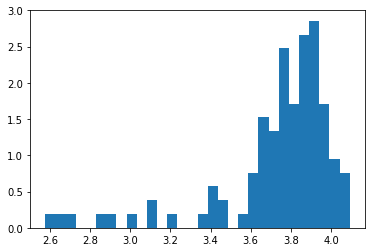

In [4]:
y = CSVdata.groupby('beer_style')['review_overall'].mean().sort_values(ascending = True);
plt.hist(y.values, density = True, bins = 30)

Wich is the most abundant beer style in our dataset?

In [5]:
x = CSVdata.groupby('beer_style')['brewery_name'].count().sort_values(ascending=True)
x

beer_style
Happoshu                                  241
Kvass                                     297
Roggenbier                                466
Faro                                      609
Gose                                      686
English Pale Mild Ale                     700
Braggot                                  1040
Bière de Champagne / Bière Brut          1046
Sahti                                    1061
Lambic - Unblended                       1114
Low Alcohol Beer                         1201
American Dark Wheat Ale                  1470
Japanese Rice Lager                      1546
Kristalweizen                            2204
Chile Beer                               2286
English Dark Mild Ale                    2314
Black & Tan                              2358
Keller Bier / Zwickel Bier               2591
Eisbock                                  2663
Euro Strong Lager                        2724
Scottish Gruit / Ancient Herbed Ale      2751
Smoked Beer            